## TASK-2 MOVIE RATINGS PREDICTION
MADHUNISHA.M

### IMPORTING IMPORTANT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

### DOWNLOADING DATASETS

In [2]:
# Data acquisition of the movies dataset
movies=pd.read_csv('movies.dat',sep='::',engine='python',encoding='latin-1',names=['MoveId','Title','Genres'])
movies.dropna(inplace=True)
movies.head()

,MoveId,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movies.shape

(3883, 3)

In [4]:
movies.isna().sum()

MoveId    0
Title     0
Genres    0
dtype: int64

In [5]:
# Data acquisition of the users dataset
users=pd.read_csv('users.dat',sep='::',engine='python',encoding='latin-1',names=['UserID','Gender','Age','Occupation','Zip-code'])
users.dropna(inplace=True)
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
users.shape

(6040, 5)

In [7]:
users.describe()

,UserID,Age,Occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [8]:
users.isna().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [9]:
# Data acquisition of the ratings  dataset
ratings=pd.read_csv('ratings.dat',sep='::',engine='python',encoding='latin-1',names=['UserID','MovieID','Ratings','TimeStamp'])
ratings.dropna(inplace=True)
ratings.head()

,UserID,MovieID,Ratings,TimeStamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [10]:
ratings.shape

(1000209, 4)

In [11]:
ratings.describe()

,UserID,MovieID,Ratings,TimeStamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [12]:
ratings.isna().sum()

UserID       0
MovieID      0
Ratings      0
TimeStamp    0
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
users['Gender']=le.fit_transform(users['Gender'])
users.head()


,UserID,Gender,Age,Occupation,Zip-code
0,1,0,1,10,48067
1,2,1,56,16,70072
2,3,1,25,15,55117
3,4,1,45,7,02460
4,5,1,25,20,55455


### CONCATENATING THE DATASETS

In [14]:
data=pd.concat([movies,ratings,users],axis=1)
data.dropna()
data.head(10)

,MoveId,Title,Genres,UserID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,978300760,1.0,0.0,1.0,10.0,48067
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,1.0,56.0,16.0,70072
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,1.0,25.0,15.0,55117
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,1.0,45.0,7.0,02460
4,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,1.0,25.0,20.0,55455
5,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,0.0,50.0,9.0,55117
6,7.0,Sabrina (1995),Comedy|Romance,1,1287,5,978302039,7.0,1.0,35.0,1.0,06810
7,8.0,Tom and Huck (1995),Adventure|Children's,1,2804,5,978300719,8.0,1.0,25.0,12.0,11413
8,9.0,Sudden Death (1995),Action,1,594,4,978302268,9.0,1.0,25.0,17.0,61614
9,10.0,GoldenEye (1995),Action|Adventure|Thriller,1,919,4,978301368,10.0,0.0,35.0,1.0,95370


In [15]:
data.shape

(1000209, 12)

### REMOVING UNNECESSARY COLUMNS

In [16]:
data1=data.drop(["Zip-code","TimeStamp"],axis=1)
data1.head()

,MoveId,Title,Genres,UserID,MovieID,Ratings,UserID,Gender,Age,Occupation
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,1.0,0.0,1.0,10.0
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,2.0,1.0,56.0,16.0
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,3.0,1.0,25.0,15.0
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,4.0,1.0,45.0,7.0
4,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,5.0,1.0,25.0,20.0


In [17]:
data1.describe()

,MoveId,UserID,MovieID,Ratings,UserID,Gender,Age,Occupation
count,3883.000000,1.000209e+06,1.000209e+06,1.000209e+06,6040.000000,6040.000000,6040.000000,6040.000000
mean,1986.049446,3.024512e+03,1.865540e+03,3.581564e+00,3020.500000,0.717053,30.639238,8.146854
std,1146.778349,1.728413e+03,1.096041e+03,1.117102e+00,1743.742145,0.450468,12.895962,6.329511
min,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.000000,1.000000,0.000000
25%,982.500000,1.506000e+03,1.030000e+03,3.000000e+00,1510.750000,0.000000,25.000000,3.000000
50%,2010.000000,3.070000e+03,1.835000e+03,4.000000e+00,3020.500000,1.000000,25.000000,7.000000
75%,2980.500000,4.476000e+03,2.770000e+03,4.000000e+00,4530.250000,1.000000,35.000000,14.000000
max,3952.000000,6.040000e+03,3.952000e+03,5.000000e+00,6040.000000,1.000000,56.000000,20.000000


In [18]:
data1.isna().sum()

MoveId        996326
Title         996326
Genres        996326
UserID             0
MovieID            0
Ratings            0
UserID        994169
Gender        994169
Age           994169
Occupation    994169
dtype: int64

### HANDLING MISSING VALUES

In [19]:
df=data1.dropna()
df.shape

(3883, 10)

### VISUALISING THE PREPROCESSED DATA

<Axes: xlabel='Gender', ylabel='count'>

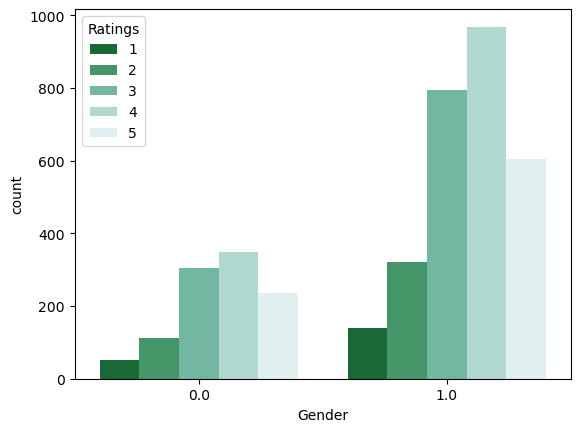

In [20]:
sns.countplot(x=df['Gender'],hue=df['Ratings'],palette='BuGn_r')

<function matplotlib.pyplot.show(close=None, block=None)>

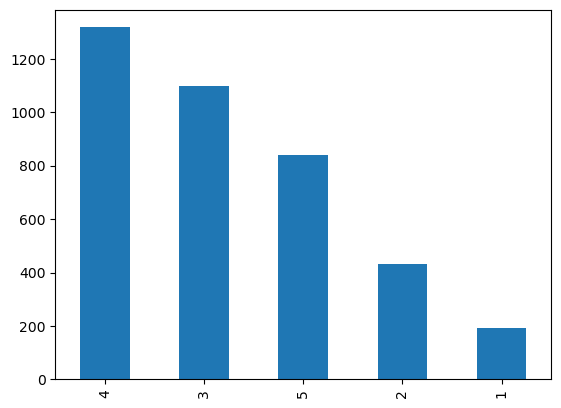

In [21]:
df['Ratings'].value_counts().plot(kind='bar')
plt.show

<Axes: ylabel='Frequency'>

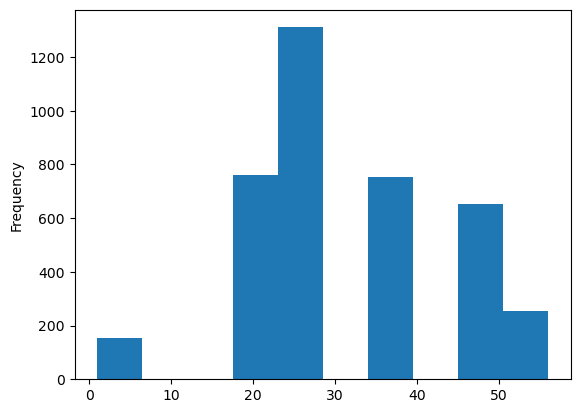

In [22]:
df['Age'].plot.hist(bins=10)
#plt.xlabel("Ratings")
#plt.ylabel("Age")

<Axes: xlabel='Age', ylabel='count'>

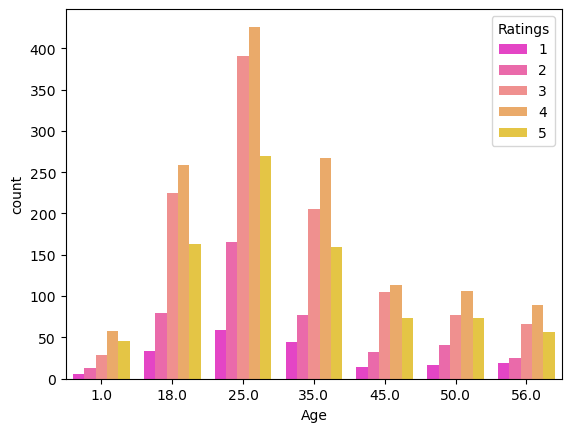

In [23]:
sns.countplot(x=df["Age"],hue=df['Ratings'],palette='spring')

In [24]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['age_group'] = pd.cut(df.Age, range(0, 81, 10), right=False, labels=labels)
df[['Age', 'age_group']].drop_duplicates()[:10]

C:\Users\Madhunisha\AppData\Local\Temp\ipykernel_29064\2330734241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = pd.cut(df.Age, range(0, 81, 10), right=False, labels=labels)


,Age,age_group
0,1.0,0-9
1,56.0,50-59
2,25.0,20-29
3,45.0,40-49
5,50.0,50-59
6,35.0,30-39
17,18.0,10-19


### FINAL DATASET

In [25]:
df.head()

,MoveId,Title,Genres,UserID,MovieID,Ratings,UserID,Gender,Age,Occupation,age_group
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,1.0,0.0,1.0,10.0,0-9
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,2.0,1.0,56.0,16.0,50-59
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,3.0,1.0,25.0,15.0,20-29
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,4.0,1.0,45.0,7.0,40-49
4,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,5.0,1.0,25.0,20.0,20-29


In [26]:
#Find the highest rating
highest_rating = df['Ratings'].max()
print("Highest rating:", highest_rating)

Highest rating: 5


In [27]:
#Filter the DataFrame to get the movie with the highest rating
highest_rated_movie = df[df['Ratings'] == highest_rating]['Title'].values[0]
print("Movie with the highest rating:", highest_rated_movie)

Movie with the highest rating: Toy Story (1995)


In [28]:
groupedby_movieName = df.groupby('Title')
groupedby_rating = df.groupby('Ratings')


In [29]:
ToyStory_data = groupedby_movieName.get_group('Toy Story (1995)')
ToyStory_data.shape

(1, 11)

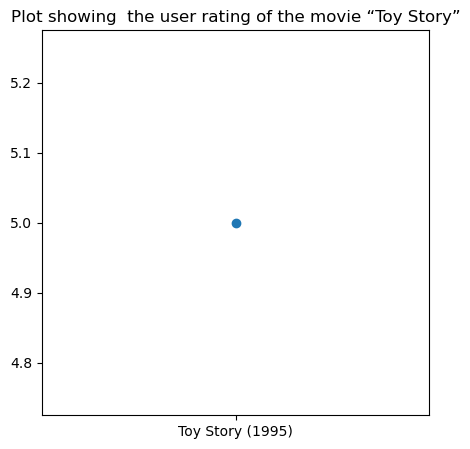

In [30]:
#Find and visualize the user rating of the movie “Toy Story”
plt.figure(figsize=(5,5))
plt.scatter(ToyStory_data['Title'],ToyStory_data['Ratings'])
plt.title('Plot showing  the user rating of the movie “Toy Story”')
plt.show()

In [31]:
#Find and visualize the viewership of the movie “Toy Story” by age group
ToyStory_data[['Title','age_group']]

,Title,age_group
0,Toy Story (1995),0-9


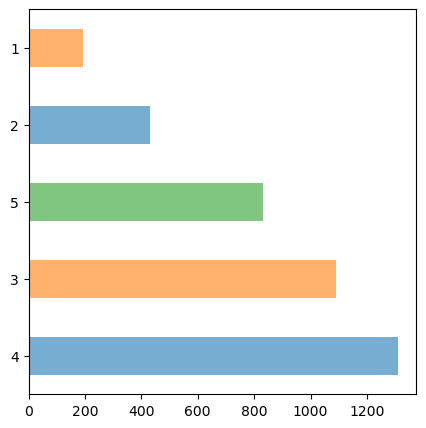

In [32]:
#Find and visualize the top 25 movies by viewership rating
top_25 = df[25:]
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
top_25['Ratings'].value_counts().plot(kind='barh',alpha=0.6,figsize=(5,5),color=custom_colors)
plt.show()

### Spliting the data into features & target 

In [33]:
features = df[['MovieID','Age','Occupation']].values
labels = df[['Ratings']].values

### Spliting the data into Training data & Testing data

In [34]:
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33)

## Model Training

### Decision Tree

In [35]:

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_labels)
Y_pred = decision_tree.predict(test)


# Calculate accuracy on test data
acc_decision_tree = round(decision_tree.score(train, train_labels) * 100, 2)
acc_decision_tree


97.77